# cuML Cheat Sheets sample code

(c) 2020 NVIDIA, Blazing SQL

Distributed under Apache License 2.0

## Imports

In [1]:
import cudf
import cuml
import numpy as np
import cupy as cp

## Create clustering dataset

<AxesSubplot:xlabel='feat_0', ylabel='feat_1'>

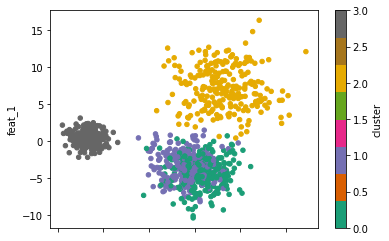

In [8]:
X, y = cuml.make_blobs(n_samples=1000, centers=4, n_features=2, cluster_std=[2, 2, 3, 1], random_state=np.random.randint(1e9))

df_clust = cudf.DataFrame(X, columns=[f'feat_{i}' for i in range(2)])
df_clust['cluster'] = cudf.Series(y)

df_clust.to_pandas().plot(kind='scatter', x='feat_0', y='feat_1', c='cluster', colormap='Dark2')

In [9]:
X_train, X_test, y_train, y_test = cuml.preprocessing.train_test_split(df_clust, 'cluster', train_size=.8)

---

# Clustering models

---

#### KMeans()

In [3]:
k_means = cuml.KMeans(
    n_clusters=4
    , n_init=3
)

In [11]:
k_means.fit(X_train)

KMeans(handle=<cuml.raft.common.handle.Handle object at 0x7fb9f58a1e70>, n_clusters=4, max_iter=300, tol=0.0001, verbose=4, random_state=1, init='scalable-k-means++', n_init=3, oversampling_factor=2.0, max_samples_per_batch=32768, output_type='cudf')

In [12]:
k_means.fit_predict(X_train)

0      1
1      1
2      0
3      1
4      1
      ..
795    2
796    3
797    1
798    1
799    2
Length: 800, dtype: int32

In [13]:
k_means.fit_transform(X_train)

,0,1,2,3
0,11.057897,3.832238,9.804677,7.685003
1,14.384244,0.584797,12.598275,10.025884
2,2.514211,12.828906,17.729368,3.229047
3,14.986088,1.606599,11.150941,10.957204
4,13.715836,0.843628,12.923170,9.276587
...,...,...,...,...
795,17.113968,12.325139,0.197855,16.154564
796,6.666832,11.968754,19.669144,3.766670
797,14.151219,2.581903,9.615127,10.515928
798,12.534364,1.845556,10.857012,8.618440


In [14]:
k_means.predict(X_test)

0      1
1      3
2      3
3      2
4      3
      ..
195    2
196    2
197    3
198    1
199    3
Length: 200, dtype: int32

In [15]:
k_means.score(X_test, y_test)

-1590.976318359375

In [16]:
k_means.transform(X_test)

,0,1,2,3
0,16.757751,5.811342,17.909374,11.814941
1,4.306818,12.145123,18.339939,2.642889
2,4.409996,9.634044,13.504210,2.974293
3,17.314899,11.977187,0.633228,16.178255
4,6.392344,8.475423,15.796008,1.416752
...,...,...,...,...
195,17.162222,12.843264,0.721843,16.378229
196,17.249197,12.733810,0.578903,16.402649
197,4.634989,13.402317,19.603783,3.979271
198,18.146263,4.252617,12.979045,13.894629


#### DBSCAN()

In [17]:
dbscan = cuml.DBSCAN(
    eps=0.5
    , min_samples=10
)

In [18]:
dbscan.fit(X_train)

DBSCAN(eps=0.5, handle=<cuml.raft.common.handle.Handle object at 0x7fb9d28277f0>, min_samples=10, verbose=4, max_mbytes_per_batch=0, output_type='cudf', calc_core_sample_indices=True)

In [19]:
dbscan.fit_predict(X_train)

0     -1
1      0
2     -1
3      0
4      0
      ..
795    1
796   -1
797   -1
798    0
799    1
Length: 800, dtype: int32

---

# Clustering metrics

---

#### metrics.trustworthiness.trustworthiness()

#### metrics.cluster.adjustedradindex.adjusted_rand_score()

In [23]:
cuml.metrics.cluster.adjusted_rand_score(y_test, k_means.predict(X_test))

0.697735859174459

#### metrics.cluster.entropy.cython_entropy()

In [32]:
cuml.metrics.cluster.entropy(k_means.predict(X_test))

1.2391249021353763

#### metrics.cluster.homogeneity_score.homogeneity_score()

In [36]:
cuml.metrics.cluster.homogeneity_score(y_test.astype('int32'), k_means.predict(X_test).astype('int32'))

0.7831898295561224

#### metrics.cluster.completeness_score.completeness_score()

In [37]:
cuml.metrics.cluster.completeness_score(y_test.astype('int32'), k_means.predict(X_test).astype('int32'))

0.8627474923997148

#### metrics.cluster.mutual_info_score.mutual_info_score()

In [38]:
cuml.metrics.cluster.mutual_info_score(y_test.astype('int32'), k_means.predict(X_test).astype('int32'))

1.0690519020873377